In [5]:
import cv2
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_length(filename):
    result = subprocess.run(["/Users/vijay/audio-orchestrator-ffmpeg/bin/ffprobe", 
                             "-v", "error", "-show_entries",
                             "format=duration", "-of",
                             "default=noprint_wrappers=1:nokey=1", 
                             filename],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT)
    return float(result.stdout)

In [3]:
t = get_length("1606b0e6_0.mp4")
print(t)

3436.6


In [6]:
df = pd.read_csv("train.csv")

In [29]:
set(df["event"])

{'challenge', 'end', 'play', 'start', 'throwin'}

In [23]:
df[df["video_id"] == "1606b0e6_0"]

video_id         time      event           event_attributes
0    1606b0e6_0   200.265822      start                        NaN
1    1606b0e6_0   201.150000  challenge     ['ball_action_forced']
2    1606b0e6_0   202.765822        end                        NaN
3    1606b0e6_0   210.124111      start                        NaN
4    1606b0e6_0   210.870000  challenge  ['opponent_dispossessed']
..          ...          ...        ...                        ...
995  1606b0e6_0  3000.870000       play       ['pass', 'freekick']
996  1606b0e6_0  3002.103519        end                        NaN
997  1606b0e6_0  3012.231795      start                        NaN
998  1606b0e6_0  3013.230000       play       ['pass', 'openplay']
999  1606b0e6_0  3014.731795        end                        NaN

[1000 rows x 4 columns]

In [31]:
int(3000.870000 * 1000.0 / frame_duration)

75021

In [17]:
times = df[df["video_id"] == "1606b0e6_0"]["time"].tolist()

In [19]:
count = 0
frames = []
cap = cv2.VideoCapture("1606b0e6_0.mp4")
# set duration in ms
duration = get_length("1606b0e6_0.mp4") * 1000.0
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
frame_duration = duration/frame_count
print("Picking frames: ")
for t in times:
    f_no = t * 1000.0 / frame_duration
    f_no = int(f_no)
    print(f"{f_no} ", end="")
    cap.set(cv2.CAP_PROP_POS_FRAMES, f_no)
    status, frame = cap.read()
    if status:
        frames.append(frame)

Picking frames: 
5006 5028 5069 5253 5271 5315 5446 5480 5508 5598 5610 5660 5723 5734 5786 5906 5917 5983 6010 6040 6059 6114 6150 6174 6202 6236 6255 6268 6336 6349 6371 6420 6434 6456 6470 6532 6578 6625 6638 6653 6700 6721 6732 6802 6846 6883 6916 6946 7035 7054 7103 7130 7249 7274 7357 7373 7396 7407 7469 7524 7556 7657 7681 7720 7761 7780 7830 7866 8113 8141 8220 8231 8879 8905 8941 9008 9034 9070 9874 9888 9937 9958 9970 10020 10027 10050 10089 10142 10179 10205 10218 10252 10281 10329 10352 10439 10452 10473 10494 10535 10667 10691 10767 10786 10964 11011 11027 11029 11055 11091 11123 11160 11186 11284 11312 11366 11406 11459 11811 11859 11874 11925 11968 12020 12063 12108 12295 12336 12357 12412 12430 12475 13029 13074 13122 13150 13234 13258 13296 13486 13532 13548 13552 13596 13615 13618 13647 13680 13775 13806 13838 13846 13861 13917 13937 14664 14675 14727 14836 14868 14898 15516 15527 15577 15618 15626 15647 15703 15721 15723 15756 15785 15898 15945 15960 16597 16637 1666

In [20]:
len(frames)

1000

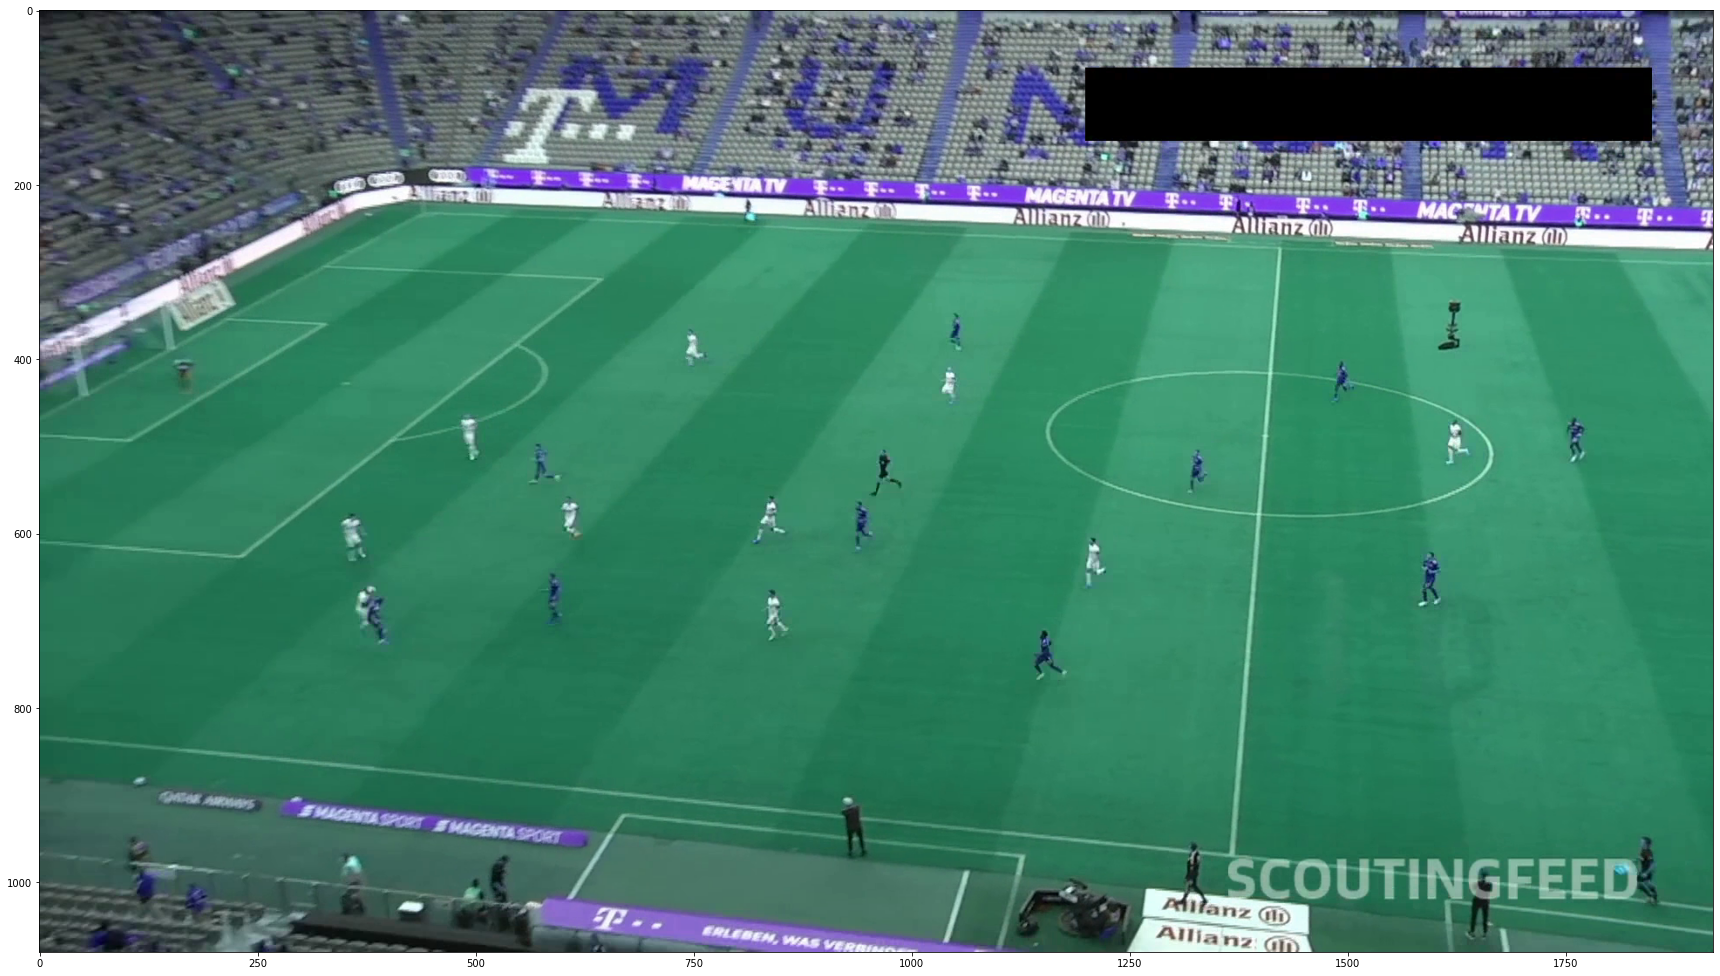

In [30]:
plt.figure(figsize=(30,20))
plt.imshow(frames[1], cmap="gray")

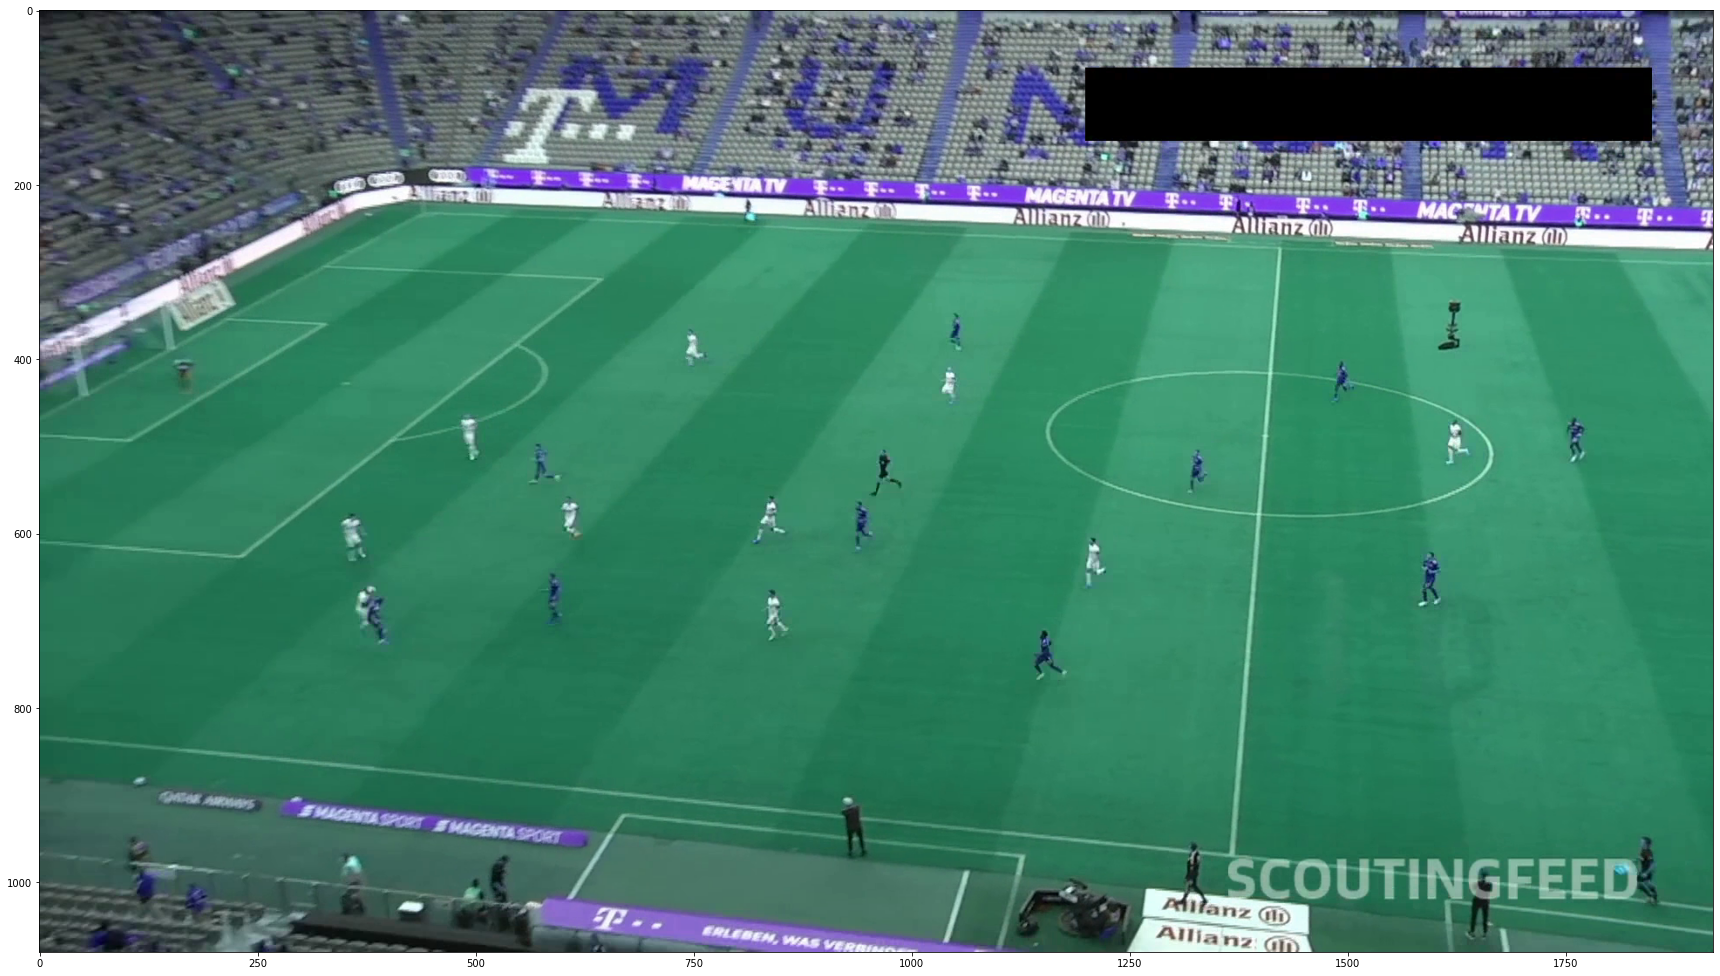

In [24]:
plt.figure(figsize=(30,20))
plt.imshow(frames[1], cmap="gray")

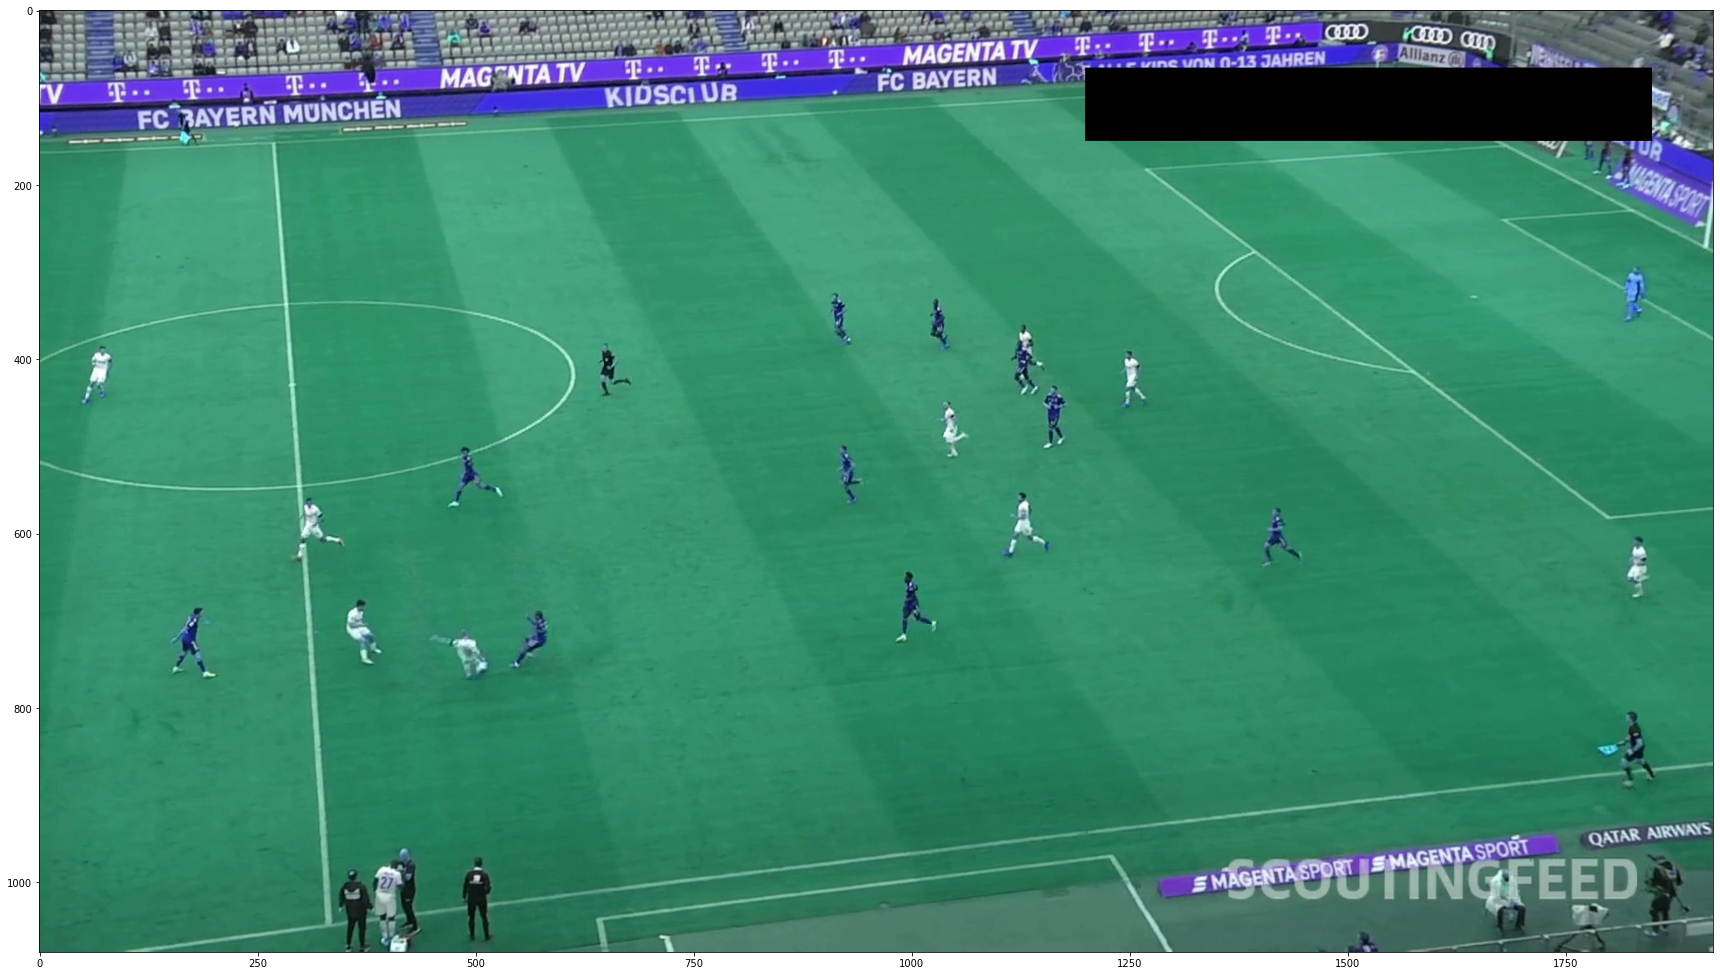

In [35]:
plt.figure(figsize=(30,20))
plt.imshow(frames[998], cmap="gray")